In [45]:
# IMPORT LIBRARIES
# These are essential tools for analyzing and visualizing data.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [46]:
# LOAD & INSPECT STOCK INDEX DATA
# Load your global stock indices file and check what’s inside.
df = pd.read_csv('all_indices_data.csv')
df['date'] = pd.to_datetime(df['date'])  # Ensures dates recognized as calendar dates


In [47]:
print(df.head())  # Preview first rows so you know the structure
print("Columns:", df.columns)
print("Stock tickers in dataset:", df['ticker'].unique())
print("Summary stats:\n", df.describe())
print("Missing values:\n", df.isnull().sum())
print("Date range:", df['date'].min(), "to", df['date'].max())


        date       open       high        low      close  volume ticker
0 1927-12-30  17.660000  17.660000  17.660000  17.660000     0.0  ^GSPC
1 1928-01-03  17.760000  17.760000  17.760000  17.760000     0.0  ^GSPC
2 1928-01-04  17.719999  17.719999  17.719999  17.719999     0.0  ^GSPC
3 1928-01-05  17.549999  17.549999  17.549999  17.549999     0.0  ^GSPC
4 1928-01-06  17.660000  17.660000  17.660000  17.660000     0.0  ^GSPC
Columns: Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ticker'], dtype='object')
Stock tickers in dataset: ['^GSPC' '^DJI' '^IXIC' '^NYA' '^XAX' '^BUK100P' '^RUT' '^VIX' '^FTSE'
 '^GDAXI' '^FCHI' '^STOXX50E' '^N100' '^BFX' 'IMOEX.ME' '^N225' '^HSI'
 '000001.SS' '399001.SZ' '^STI' '^AXJO' '^AORD' '^BSESN' '^JKSE' '^KLSE'
 '^NZ50' '^KS11' '^TWII' '^GSPTSE' '^BVSP' '^MXX' '^IPSA' '^MERV'
 '^TA125.TA' '^JN0U.JO']
Summary stats:
                                 date          open          high  \
count                         291102  2.911020e+05  2.91102

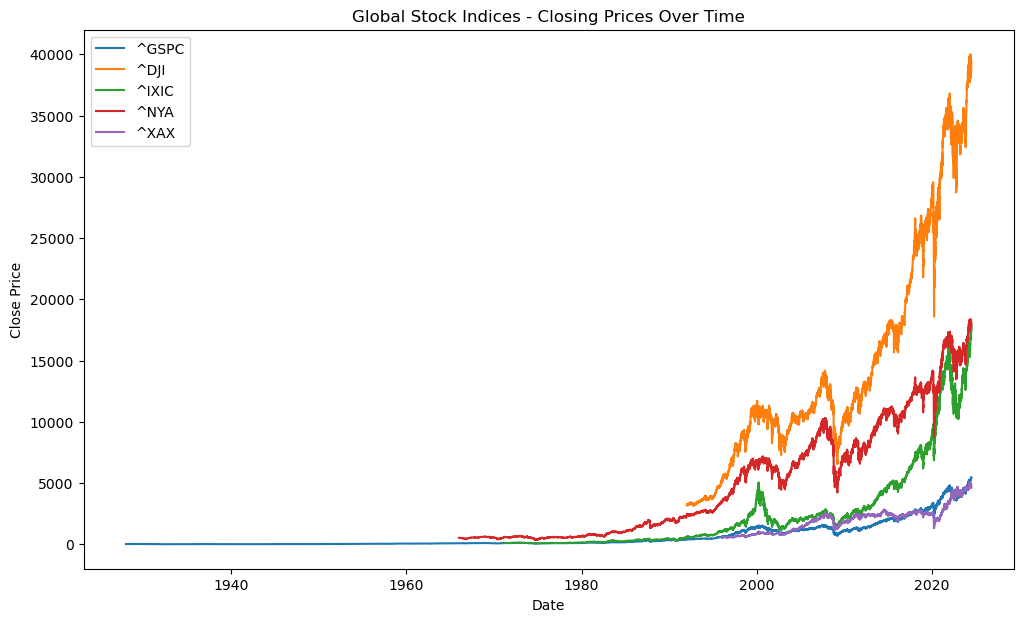

In [48]:
# PLOT CLOSING PRICES OF SELECTED GLOBAL INDICES
# Shows overall trends in multiple global stock markets.
tickers_to_plot = df['ticker'].unique()[:5]  # Example: first 5 indices

plt.figure(figsize=(12,7))
for ticker in tickers_to_plot:
    ticker_data = df[df['ticker'] == ticker]
    plt.plot(ticker_data['date'], ticker_data['close'], label=ticker)
plt.title("Global Stock Indices - Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [51]:
# CALCULATE DAILY RETURNS, MOVING AVERAGES, VOLATILITY
# Financial metrics: daily % change, price trend, and risk.
df_sorted = df.sort_values(['ticker', 'date'])
df_sorted['daily_return'] = df_sorted.groupby('ticker')['close'].pct_change()
window = 30
df_sorted['moving_avg_30d'] = df_sorted.groupby('ticker')['close'].transform(lambda x: x.rolling(window).mean())
df_sorted['volatility_30d'] = df_sorted.groupby('ticker')['daily_return'].transform(lambda x: x.rolling(window).std())

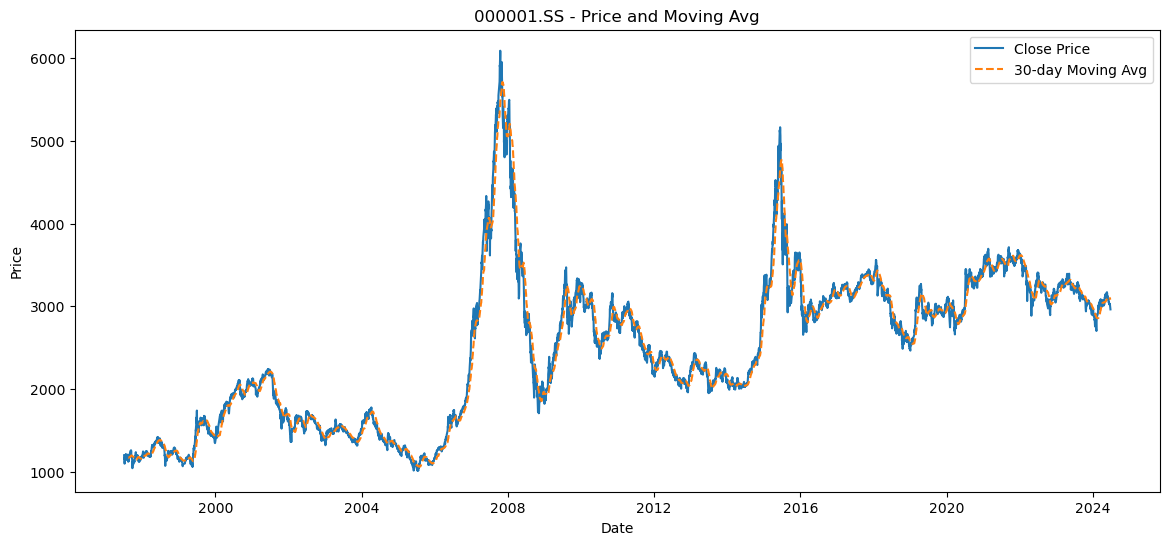

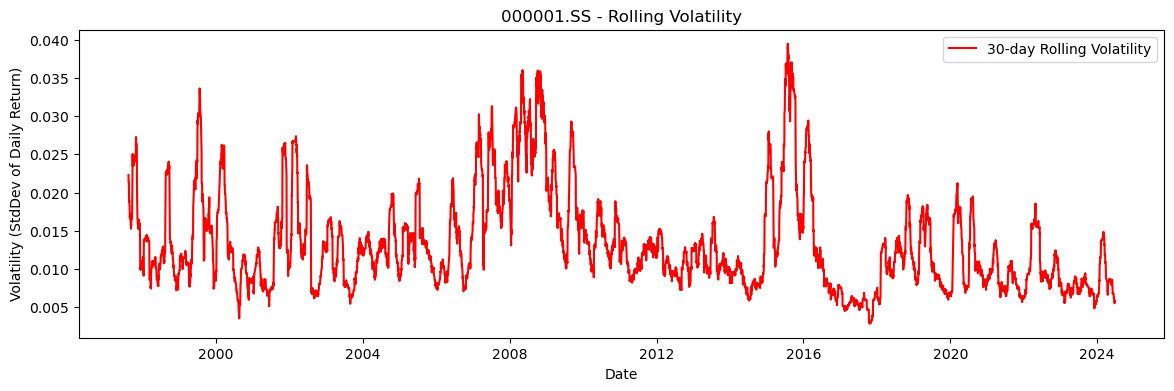

In [52]:
# Plot one index as example (shows trend and risk)
sample_ticker = df_sorted['ticker'].unique()[0]
sample_data = df_sorted[df_sorted['ticker'] == sample_ticker]

plt.figure(figsize=(14,6))
plt.plot(sample_data['date'], sample_data['close'], label='Close Price')
plt.plot(sample_data['date'], sample_data['moving_avg_30d'], linestyle='--', label='30-day Moving Avg')
plt.title(f"{sample_ticker} - Price and Moving Avg")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

plt.figure(figsize=(14,4))
plt.plot(sample_data['date'], sample_data['volatility_30d'], color='red', label='30-day Rolling Volatility')
plt.title(f"{sample_ticker} - Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (StdDev of Daily Return)")
plt.legend()
plt.show()


In [9]:
summary = df_sorted.groupby('ticker').agg(
    avg_return=('daily_return', 'mean'),
    std_return=('daily_return', 'std'),
    min_date=('date', 'min'),
    max_date=('date', 'max')
).sort_values('avg_return', ascending=False)

print(summary)


           avg_return  std_return   min_date   max_date
ticker                                                 
^MERV        0.004123    0.233542 1996-10-08 2024-06-24
^VIX         0.002249    0.069655 1990-01-02 2024-06-24
^BVSP        0.001338    0.021678 1993-04-27 2024-06-24
^MXX         0.000541    0.014057 1991-11-08 2024-06-24
^BSESN       0.000540    0.014477 1997-07-01 2024-06-24
^IXIC        0.000464    0.012635 1971-02-05 2024-06-24
^TA125.TA    0.000449    0.013391 1992-10-08 2024-06-24
^GDAXI       0.000410    0.013804 1987-12-30 2024-06-24
IMOEX.ME     0.000389    0.014540 2013-03-05 2024-06-14
^IPSA        0.000380    0.009631 2002-01-02 2019-06-14
^JKSE        0.000379    0.013752 1990-04-06 2024-06-24
^XAX         0.000372    0.011668 1995-12-27 2024-06-24
^DJI         0.000369    0.011020 1992-01-02 2024-06-24
^NZ50        0.000363    0.007156 2003-01-03 2024-06-24
^RUT         0.000360    0.013536 1987-09-10 2024-06-24
^HSI         0.000343    0.016142 1986-12-31 202

In [54]:
#DASHBOARD: RETURNS & RISK ACROSS INDICES
summary = df_sorted.groupby('ticker').agg(
    avg_return=('daily_return', 'mean'),
    std_return=('daily_return', 'std'),
    min_date=('date', 'min'),
    max_date=('date', 'max')
).sort_values('avg_return', ascending=False)
print(summary)

           avg_return  std_return   min_date   max_date
ticker                                                 
^MERV        0.004123    0.233542 1996-10-08 2024-06-24
^VIX         0.002249    0.069655 1990-01-02 2024-06-24
^BVSP        0.001338    0.021678 1993-04-27 2024-06-24
^MXX         0.000541    0.014057 1991-11-08 2024-06-24
^BSESN       0.000540    0.014477 1997-07-01 2024-06-24
^IXIC        0.000464    0.012635 1971-02-05 2024-06-24
^TA125.TA    0.000449    0.013391 1992-10-08 2024-06-24
^GDAXI       0.000410    0.013804 1987-12-30 2024-06-24
IMOEX.ME     0.000389    0.014540 2013-03-05 2024-06-14
^IPSA        0.000380    0.009631 2002-01-02 2019-06-14
^JKSE        0.000379    0.013752 1990-04-06 2024-06-24
^XAX         0.000372    0.011668 1995-12-27 2024-06-24
^DJI         0.000369    0.011020 1992-01-02 2024-06-24
^NZ50        0.000363    0.007156 2003-01-03 2024-06-24
^RUT         0.000360    0.013536 1987-09-10 2024-06-24
^HSI         0.000343    0.016142 1986-12-31 202

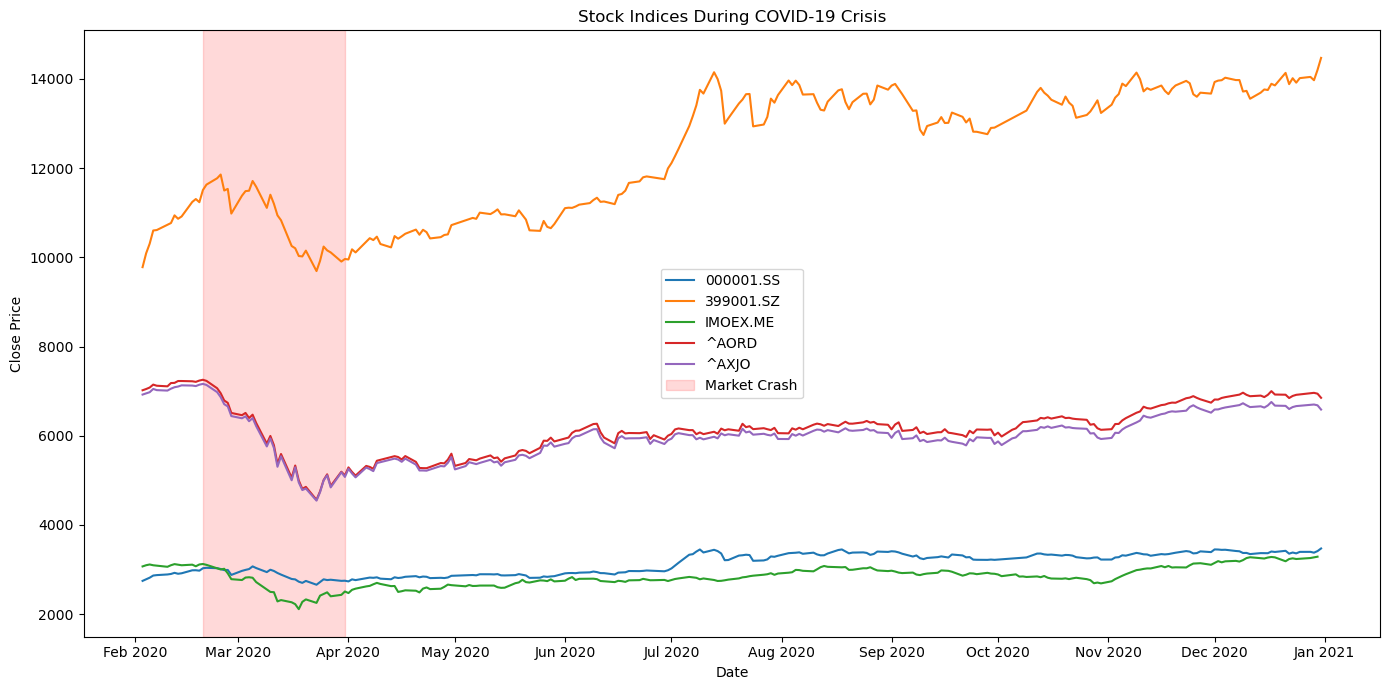

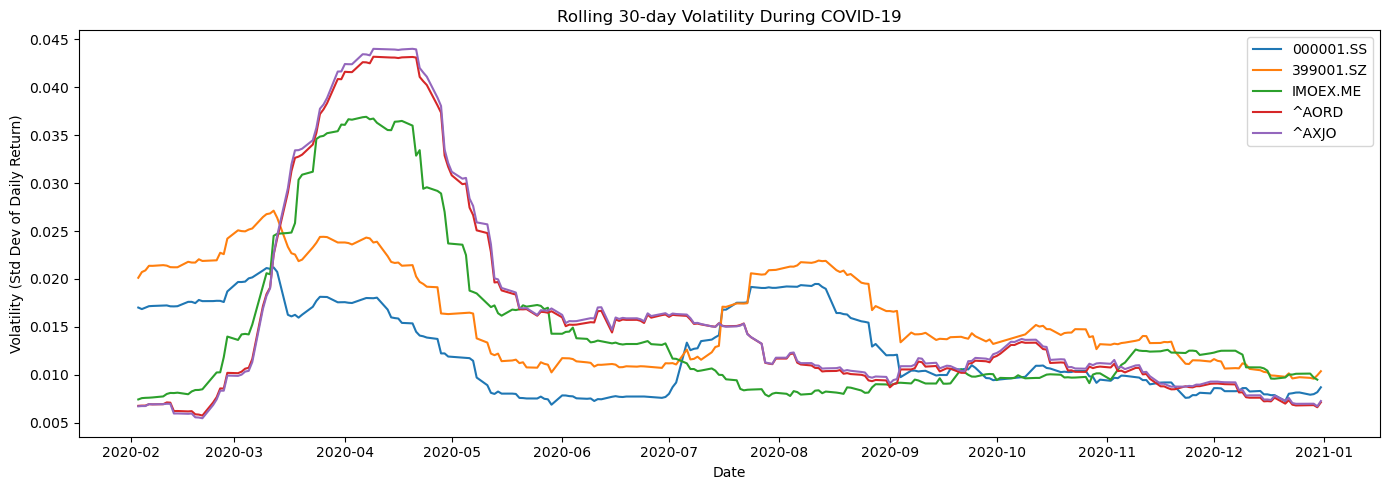

In [55]:
# CRISIS ANALYSIS: COVID-19 STOCK MARKET CRASH
# Shows real-world shock periods.
import matplotlib.dates as mdates
start_event = '2020-02-01'
end_event = '2020-12-31'
selected_tickers = df_sorted['ticker'].unique()[:5]
covid_period = df_sorted[
    (df_sorted['date'] >= start_event) & 
    (df_sorted['date'] <= end_event) &
    (df_sorted['ticker'].isin(selected_tickers))
]

plt.figure(figsize=(14, 7))
for ticker in selected_tickers:
    subset = covid_period[covid_period['ticker'] == ticker]
    plt.plot(subset['date'], subset['close'], label=ticker)
plt.axvspan(pd.to_datetime('2020-02-20'), pd.to_datetime('2020-03-31'), color='red', alpha=0.15, label='Market Crash')
plt.title('Stock Indices During COVID-19 Crisis')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

plt.figure(figsize=(14, 5))
for ticker in selected_tickers:
    subset = covid_period[covid_period['ticker'] == ticker]
    plt.plot(subset['date'], subset['volatility_30d'], label=ticker)
plt.title('Rolling 30-day Volatility During COVID-19')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev of Daily Return)')
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
# MACRO DATA: LOAD AND PREP WORLD BANK INDICATORS
# Example: use GDP and Inflation for the US and others.
wdi = pd.read_csv('world_bank_development_indicators.csv')
print(wdi.columns)
print(wdi[wdi['country'].isin(['United States', 'United Kingdom'])][
    ['country', 'date', 'GDP_current_US', 'inflation_annual%']
].head())
wdi['year'] = pd.to_datetime(wdi['date']).dt.year
df_sorted['year'] = df_sorted['date'].dt.year



Index(['country', 'date', 'agricultural_land%', 'forest_land%', 'land_area',
       'avg_precipitation', 'trade_in_services%',
       'control_of_corruption_estimate', 'control_of_corruption_std',
       'access_to_electricity%', 'renewvable_energy_consumption%',
       'electric_power_consumption', 'CO2_emisions',
       'other_greenhouse_emisions', 'population_density', 'inflation_annual%',
       'real_interest_rate', 'risk_premium_on_lending',
       'research_and_development_expenditure%', 'central_goverment_debt%',
       'tax_revenue%', 'expense%', 'goverment_effectiveness_estimate',
       'goverment_effectiveness_std', 'human_capital_index', 'doing_business',
       'time_to_get_operation_license', 'statistical_performance_indicators',
       'individuals_using_internet%', 'logistic_performance_index',
       'military_expenditure%', 'GDP_current_US',
       'political_stability_estimate', 'political_stability_std',
       'rule_of_law_estimate', 'rule_of_law_std',
       'reg

In [58]:
# Link stock tickers to countries for data merging
ticker_country_map = {
    '^GSPC': 'United States',
    '^FTSE': 'United Kingdom',
    '^N225': 'Japan',
    '^GDAXI': 'Germany',
    '^BSESN': 'India'
}
df_sorted['country'] = df_sorted['ticker'].map(ticker_country_map)


In [59]:
# Merge GDP and inflation data with the stock dataset
merged = pd.merge(
    df_sorted,
    wdi[['country', 'year', 'GDP_current_US', 'inflation_annual%']],
    how='left', 
    on=['country', 'year']
)
print(merged[['ticker', 'country', 'date', 'close', 'GDP_current_US', 'inflation_annual%']].head())

      ticker country       date        close  GDP_current_US  \
0  000001.SS     NaN 1997-07-02  1199.061035             NaN   
1  000001.SS     NaN 1997-07-03  1150.623047             NaN   
2  000001.SS     NaN 1997-07-04  1159.342041             NaN   
3  000001.SS     NaN 1997-07-07  1096.818970             NaN   
4  000001.SS     NaN 1997-07-08  1109.666016             NaN   

   inflation_annual%  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  


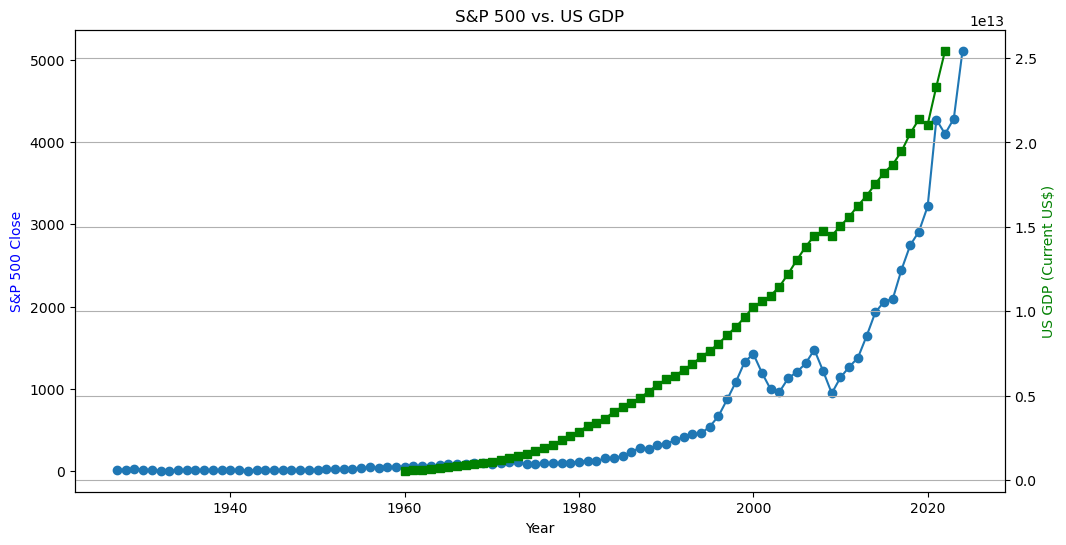

In [60]:
# BUSINESS INSIGHT: US STOCKS VS. US GDP OVER TIME
# Annual averages and macro trends
usa_df = merged[(merged['country'] == 'United States') & (merged['ticker'] == '^GSPC')]
yearly_stock = usa_df.groupby('year')['close'].mean().reset_index()
yearly_gdp = usa_df[['year', 'GDP_current_US']].drop_duplicates()

plt.figure(figsize=(12,6))
plt.plot(yearly_stock['year'], yearly_stock['close'], marker='o', label='S&P 500 Avg. Close')
plt.xlabel('Year')
plt.ylabel('S&P 500 Close', color='blue')
plt.twinx().plot(yearly_gdp['year'], yearly_gdp['GDP_current_US'], marker='s', color='green', label='US GDP')
plt.ylabel('US GDP (Current US$)', color='green')
plt.title('S&P 500 vs. US GDP')
plt.grid(True)
plt.show()


In [62]:
#Clean combined data to years with both values
stock_gdp = pd.merge(yearly_stock, yearly_gdp, on='year')
stock_gdp_clean = stock_gdp.dropna(subset=['GDP_current_US'])
print("Years in analysis:", stock_gdp_clean['year'].tolist())
print("Number of valid points:", len(stock_gdp_clean))
if len(stock_gdp_clean) > 1:
    correlation = np.corrcoef(stock_gdp_clean['close'], stock_gdp_clean['GDP_current_US'])[0,1]
    print(f"Correlation between S&P 500 and US GDP (valid years only): {correlation:.2f}")
else:
    print("Not enough non-null data points to compute correlation.")

Years in analysis: [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Number of valid points: 63
Correlation between S&P 500 and US GDP (valid years only): 0.94


Correlation (2010+): 0.98


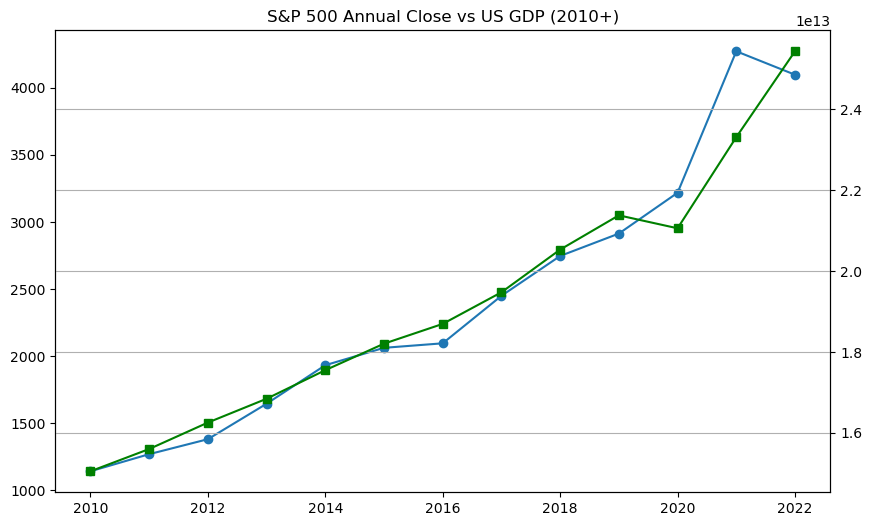

In [64]:
# Focus on modern years (2010+)
stock_gdp_modern = stock_gdp_clean[stock_gdp_clean['year'] >= 2010]
if len(stock_gdp_modern) > 1:
    corr_modern = np.corrcoef(stock_gdp_modern['close'], stock_gdp_modern['GDP_current_US'])[0,1]
    print(f"Correlation (2010+): {corr_modern:.2f}")
else:
    print("Not enough data for modern period.") 
plt.figure(figsize=(10,6))
plt.plot(stock_gdp_modern['year'], stock_gdp_modern['close'], marker='o', label='S&P 500 Close')
plt.twinx().plot(stock_gdp_modern['year'], stock_gdp_modern['GDP_current_US'], 'g', marker='s', label='US GDP')
plt.title("S&P 500 Annual Close vs US GDP (2010+)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

      year        close  inflation_annual%
260   2010  1139.965512           1.640043
534   2011  1267.638809           3.156842
808   2012  1379.354160           2.069337
1082  2013  1643.798968           1.464833
1356  2014  1931.376110           1.622223
1630  2015  2061.067741           0.118627
1904  2016  2094.651264           1.261583
2178  2017  2449.076379           2.130110
2452  2018  2746.214183           2.442583
2726  2019  2913.356380           1.812210
3000  2020  3217.855849           1.233584
3267  2021  4273.385635           4.697859
3533  2022  4098.514748           8.002800


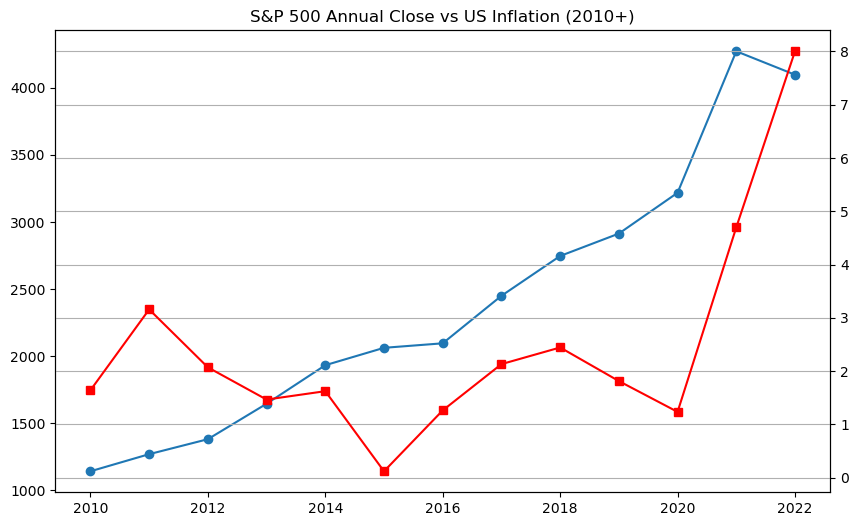

Correlation between S&P 500 Close and US Inflation (2010+): 0.63


In [65]:
# ADDITIONAL ANALYSIS: INFLATION AND STOCK MARKET
# How inflation affects investment performance.
stock_inflation = stock_gdp_modern.merge(
    wdi[['year', 'country', 'inflation_annual%']],
    left_on=['year'],
    right_on=['year'],
    how='left'
)
stock_inflation = stock_inflation[stock_inflation['country'] == 'United States']
stock_inflation = stock_inflation[(stock_inflation['year'] >= 2010) & (~stock_inflation['inflation_annual%'].isna())]
print(stock_inflation[['year', 'close', 'inflation_annual%']])

plt.figure(figsize=(10,6))
plt.plot(stock_inflation['year'], stock_inflation['close'], marker='o', label='S&P 500 Close')
plt.twinx().plot(stock_inflation['year'], stock_inflation['inflation_annual%'], 'r', marker='s', label='US Inflation')
plt.title('S&P 500 Annual Close vs US Inflation (2010+)')
plt.xlabel('Year')
plt.grid(True)
plt.show()
if len(stock_inflation) > 1:
    corr_infl = np.corrcoef(stock_inflation['close'], stock_inflation['inflation_annual%'])[0,1]
    print(f"Correlation between S&P 500 Close and US Inflation (2010+): {corr_infl:.2f}")
else:
    print("Not enough data for correlation.")


    year        close    UNRATE
0   2010  1139.965512  9.608333
1   2011  1267.638809  8.933333
2   2012  1379.354160  8.075000
3   2013  1643.798968  7.358333
4   2014  1931.376110  6.158333
5   2015  2061.067741  5.275000
6   2016  2094.651264  4.875000
7   2017  2449.076379  4.358333
8   2018  2746.214183  3.891667
9   2019  2913.356380  3.675000
10  2020  3217.855849  8.100000
11  2021  4273.385635  5.358333
12  2022  4098.514748  3.641667


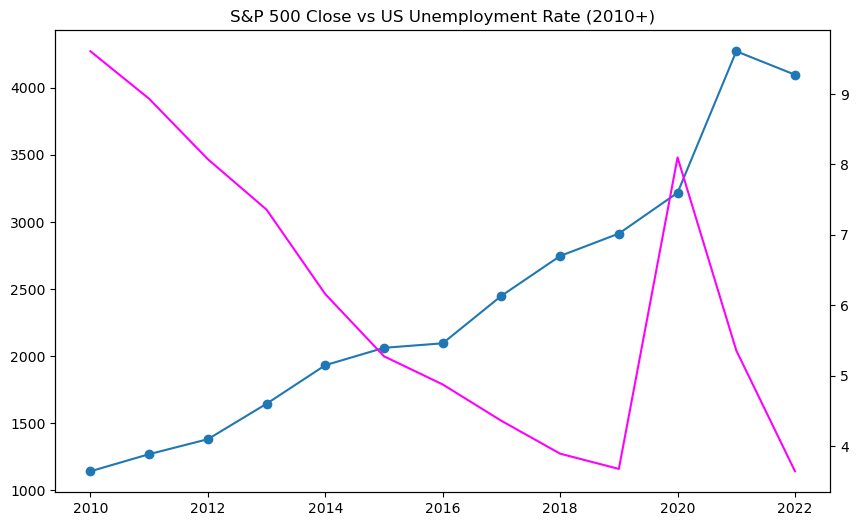

Correlation between S&P 500 Close and US Unemployment Rate (2010+): -0.63


In [66]:
# ADVANCED: S&P 500 VS. US UNEMPLOYMENT (FRED DATA)
# Downloads unemployment as economic signal.
fred_unemp = pd.read_csv('UNRATE.csv')
fred_unemp['year'] = pd.to_datetime(fred_unemp['observation_date']).dt.year
fred_yearly = fred_unemp.groupby('year')['UNRATE'].mean().reset_index()
stock_unemp = stock_gdp_modern.merge(fred_yearly, on='year', how='left')
print(stock_unemp[['year', 'close', 'UNRATE']])

plt.figure(figsize=(10,6))
plt.plot(stock_unemp['year'], stock_unemp['close'], marker='o', label='S&P 500 Close')
plt.twinx().plot(stock_unemp['year'], stock_unemp['UNRATE'], color='magenta', label='US Unemployment Rate')
plt.title('S&P 500 Close vs US Unemployment Rate (2010+)')
plt.xlabel('Year')
plt.show()
if len(stock_unemp.dropna(subset=['UNRATE'])) > 1:
    corr_unemp = np.corrcoef(stock_unemp['close'], stock_unemp['UNRATE'])[0,1]
    print(f"Correlation between S&P 500 Close and US Unemployment Rate (2010+): {corr_unemp:.2f}")
else:
    print("Not enough data for unemployment correlation.")